In [498]:
from gensim.models import KeyedVectors
import json

# Word2Vecモデルのロード
model = KeyedVectors.load_word2vec_format('model_neo_nouns_only.bin', binary=True)

with open('word_pairs.json', 'r', encoding='utf-8') as f:
    word_pairs = json.load(f)
# print(word_pairs)
# print(type(word_pairs))

In [807]:
# コサイン類似度のリストを生成
cosine_similarities = []
not_exist_word_lst = []
vector_diff = []
for word1, word2 in word_pairs:
    if word1 in model.key_to_index and word2 in model.key_to_index:
        similarity = model.similarity(word1, word2)
        vector_diff.append(model[word1] - model[word2])
        cosine_similarities.append((word1, word2, similarity))
        # cosine_similarities.append(similarity)
    else:
        not_exist_word_lst.append((word1, word2))  # 単語がモデルにない場合
cosine_similarities

import pandas as pd 
df = pd.DataFrame(cosine_similarities, columns=["w1", "w2", "score"])

,w1,w2,score
0,冬休み,春休み,0.725294
1,副業,アルバイト,0.451814
2,twitter,Line,0.155082
3,水族館,動物園,0.662559
4,ファミレス,カフェ,0.393981
...,...,...,...
97,変態,天才,0.249239
98,宇宙船,ガンダム,0.398034
99,妖怪ウォッチ,デジモン,0.395920
100,遊戯王,ヴァンガード,0.329208


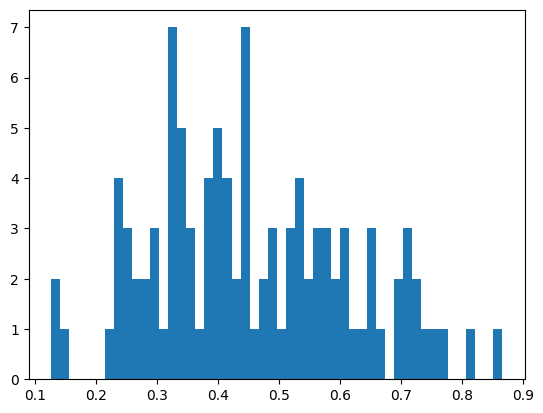

In [810]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
df = pd.DataFrame(cosine_similarities, columns=["w1", "w2", "score"])
plt.hist(df["score"], bins=50)
m = np.array(vector_diff)


0.0018366788
0.28307894


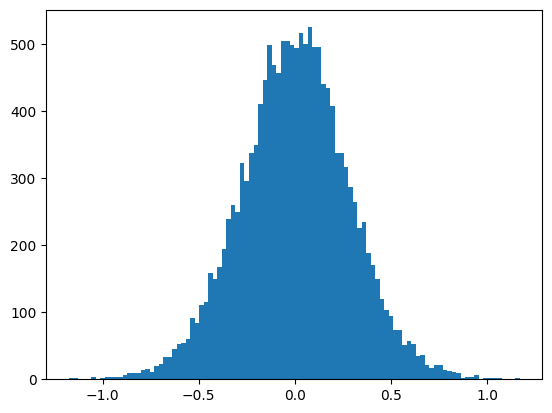

In [861]:
vector_diff
v = np.concatenate(vector_diff[0:50])
plt.hist(v,100)
print(np.mean(v))
print(np.std(v))

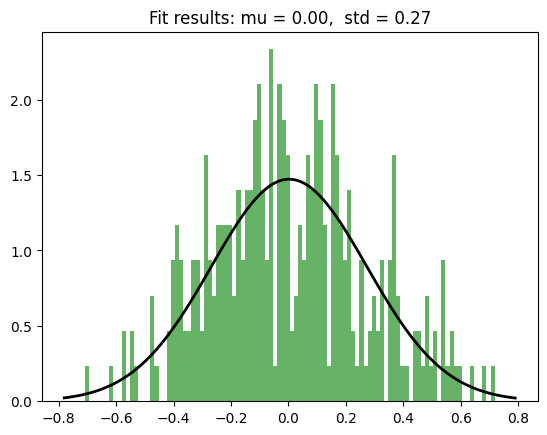

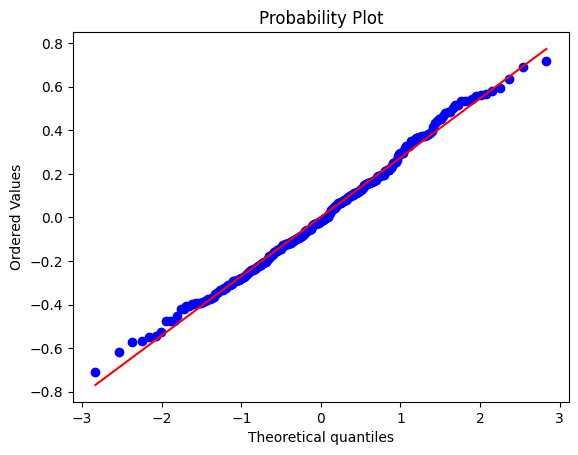

シャピロ・ウィルク検定: 統計量 = 0.9933241009712219, p値 = 0.2041519731283188
歪度: 0.18910500266594013, 尖度: -0.32492598472115874


In [864]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# 視覚的な分析
# ヒストグラム
v = vector_diff[1]
plt.hist(v, bins=100, density=True, alpha=0.6, color='g')

# 正規分布曲線を重ねる
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(v), np.std(v))
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (np.mean(v), np.std(v))
plt.title(title)

plt.show()

# Q-Qプロット
stats.probplot(v, dist="norm", plot=plt)
plt.show()

# 統計的検定
# シャピロ・ウィルク検定
shapiro_test = stats.shapiro(v)
print(f"シャピロ・ウィルク検定: 統計量 = {shapiro_test[0]}, p値 = {shapiro_test[1]}")

# 歪度と尖度
skewness = stats.skew(v)
kurtosis = stats.kurtosis(v)
print(f"歪度: {skewness}, 尖度: {kurtosis}")

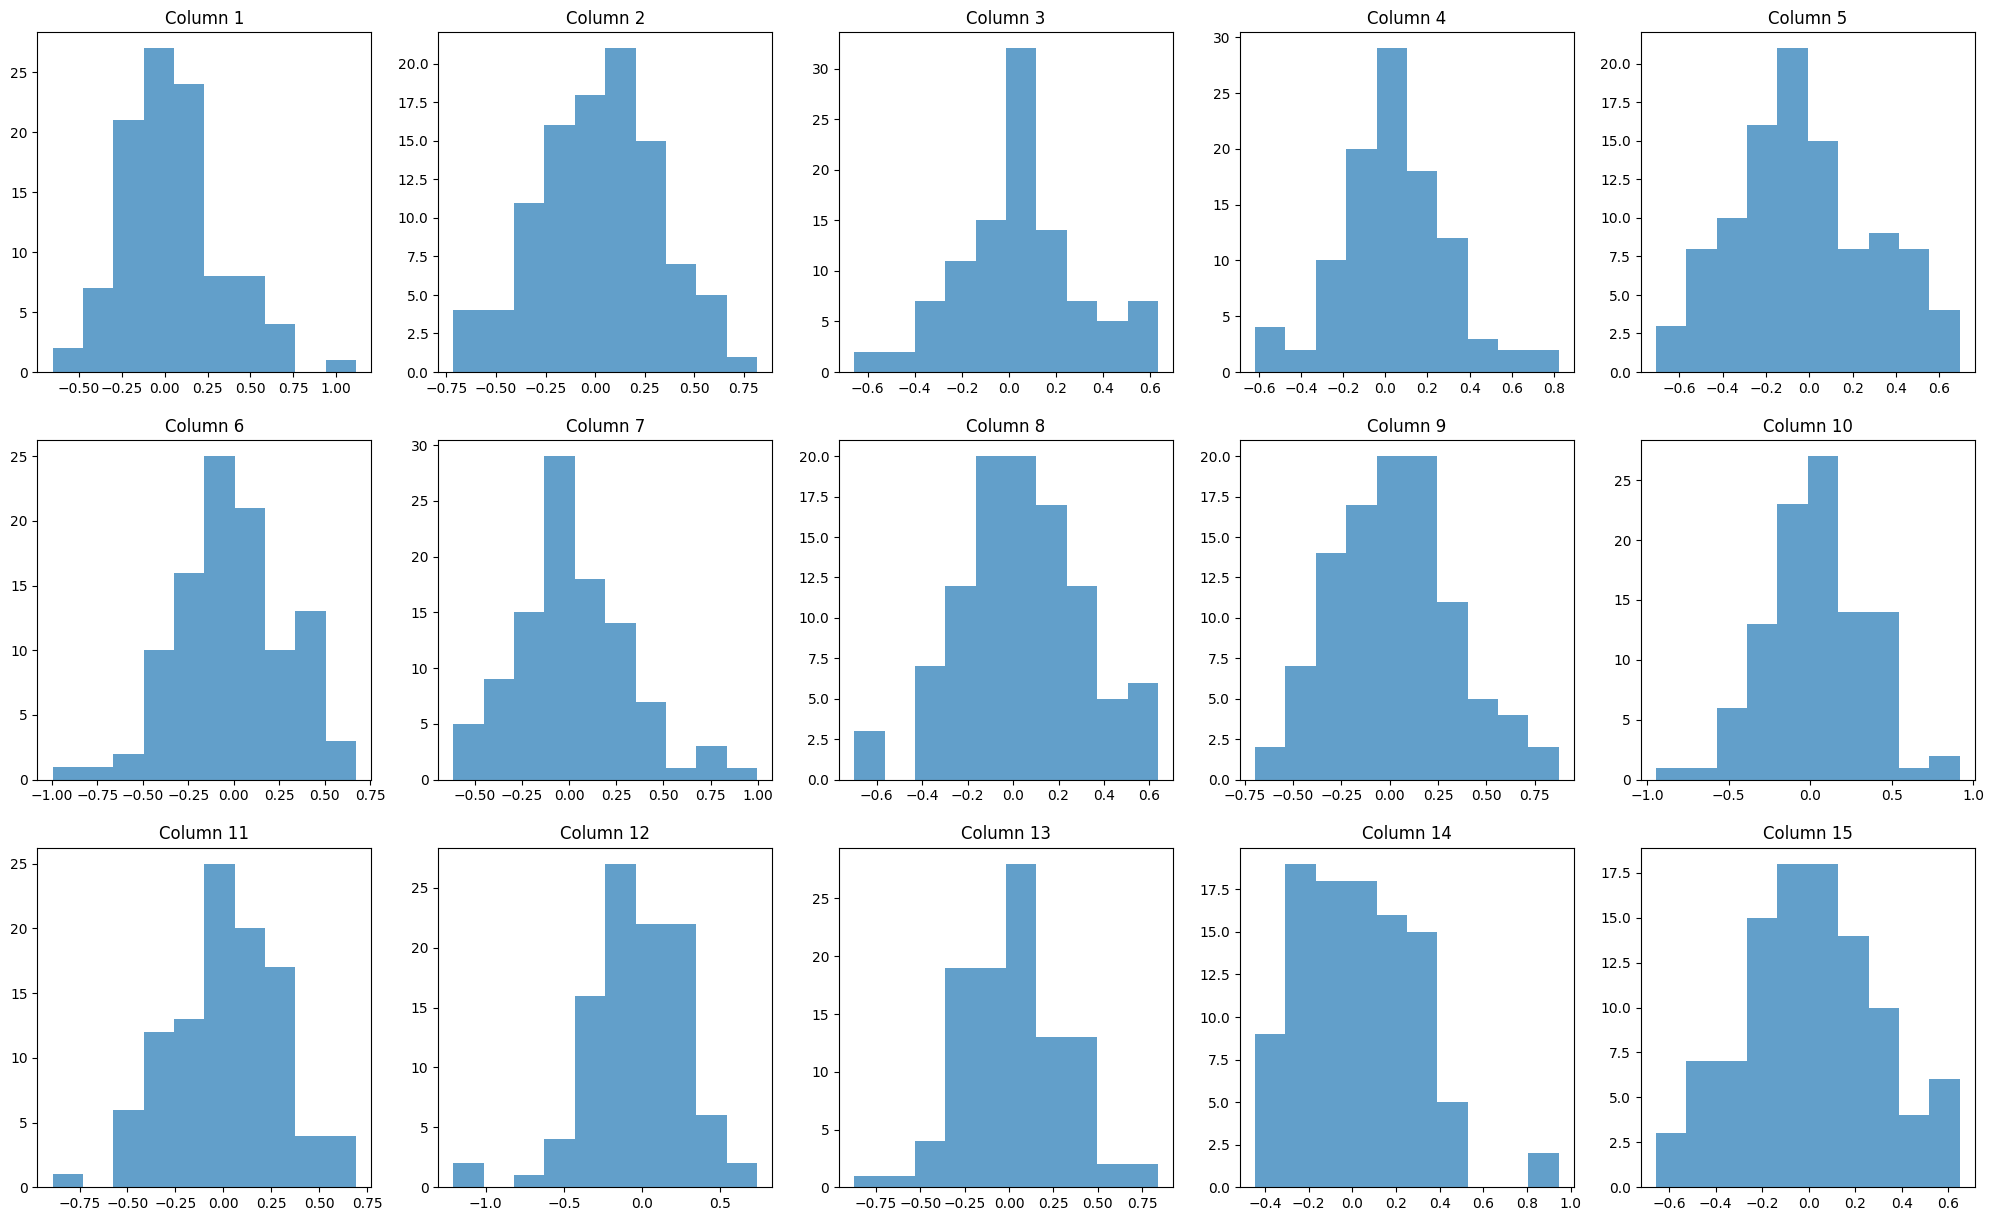

In [501]:
columns_to_plot = 15
plt.figure(figsize=(25,15))
for i in range(columns_to_plot):
    # plt.subplot(1, columns_to_plot, i + 1)
    plt.subplot(3,5,i+1)
    plt.hist(m[:, i], bins=10, alpha=0.7)
    plt.title(f'Column {i+1}')

In [502]:
mean = np.mean(vector_diff, axis=0)

In [503]:
mean

array([ 4.28344682e-02,  2.21896898e-02,  4.46548164e-02,  4.08298410e-02,
       -2.47486681e-02, -5.98934153e-03,  1.75935738e-02,  3.23775969e-02,
        3.20769958e-02,  3.63779031e-02,  1.51363919e-02, -3.08772381e-02,
        2.84670349e-02,  2.55958326e-02,  1.49029586e-03,  4.43835407e-02,
        5.26896194e-02, -6.24167221e-03,  2.20877510e-02, -3.34676206e-02,
       -4.97445129e-02,  3.72623503e-02, -4.93558049e-02, -2.14988347e-02,
       -1.19937994e-02,  3.40580158e-02, -1.76030006e-02,  3.08692548e-02,
       -1.46647468e-02, -4.12523653e-03,  1.97656527e-02, -2.99402010e-02,
       -2.95817368e-02, -1.14680156e-02, -4.93126884e-02, -7.83615932e-03,
        4.22400013e-02,  2.67306386e-05, -4.57456615e-03,  3.21297944e-02,
       -1.23970779e-02, -1.28946854e-02, -2.99741141e-02, -1.97914373e-02,
       -4.33304273e-02,  2.67269872e-02,  3.64638120e-02, -1.13608204e-02,
       -1.74432658e-02, -1.48399891e-02,  3.70447710e-02, -5.71866846e-03,
       -1.10910824e-02, -

In [802]:
import random
# モデルの語彙からランダムに単語を選択
random_word = random.choice(list(model.index_to_key))

# print(random_word)
# 選択した単語のベクトルを取得
random_word_vec = model[random_word]
similar_word_vec = random_word_vec + mean

similar_words = model.similar_by_vector(similar_word_vec, topn=10)
closest_word = similar_words

print(f"元の単語: {random_word}")
print(f"最も近い単語: {closest_word}")

元の単語: 49年度
最も近い単語: [('49年度', 0.9955248236656189), ('39年度', 0.8480615019798279), ('9年度', 0.8292011022567749), ('48年度', 0.8268633484840393), ('47年度', 0.819308876991272), ('46年度', 0.8143236041069031), ('50年度', 0.8093916177749634), ('36年度', 0.8062110543251038), ('45年度', 0.8032659888267517), ('32年度', 0.8027517795562744)]


ipadic辞書を使う。  
neologdも使いたいが、使用頻度が高いものを使えればいいがわからい